### Gradient Boosting

- decisiontree 기반
- 경사 하강법 사용 / 이천 트리의 오차를 보완하면서 순차적 트리 생성
- 랜덤성 없음
- learning rate ! >> 경사 하강법의 오차 보정률..
- n_estimators, max_depth, loss/손실함수  
>- deviance(logistic regression), exponential / ls(least squares regression)
>- verbose = progress와 performance print에 관한 설정 
>- n_estimators 많을수록 과대적합 가능성 올라감

- 멀티 클래스 n_classes * n_estimators .... > 랜덤 포레스트 추천


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier # loss = 'deviance'
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer();
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=42)

gbc = GradientBoostingClassifier(random_state=0)
# default - learning_late: 0.1, n_estimators: 100, max_depth: 3
gbc.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbc.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbc.score(X_test, y_test)))
cvs = cross_val_score(gbc, cancer.data, cancer.target, cv=5)
print("cv = 5 테스트 세트 정확도 : {:.3f}  ".format(cvs.mean()))
cvs = cross_val_score(gbc, cancer.data, cancer.target, cv=10)
print("cv = 10 테스트 세트 정확도 : {:.3f}  ".format(cvs.mean()))


#과대적합

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958
cv = 5 테스트 세트 정확도 : 0.963  
cv = 10 테스트 세트 정확도 : 0.960  


In [5]:
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01).fit(X_train,y_train)

print("learning_late= 0.01")
print("훈련 세트 정확도 : {:.3f}".format(gbc.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbc.score(X_test, y_test)))
cvs = cross_val_score(gbc, cancer.data, cancer.target, cv=5)
print("cv = 5 테스트 세트 정확도 : {:.3f}  ".format(cvs.mean()))
cvs = cross_val_score(gbc, cancer.data, cancer.target, cv=10)
print("cv = 10 테스트 세트 정확도 : {:.3f}  ".format(cvs.mean()))


gbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train,y_train)

print("max_depth = 1")
print("훈련 세트 정확도 : {:.3f}".format(gbc.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbc.score(X_test, y_test)))
cvs = cross_val_score(gbc, cancer.data, cancer.target, cv=5)
print("cv = 5 테스트 세트 정확도 : {:.3f}  ".format(cvs.mean()))
cvs = cross_val_score(gbc, cancer.data, cancer.target, cv=10)
print("cv = 10 테스트 세트 정확도 : {:.3f}  ".format(cvs.mean()))


learning_late= 0.01
훈련 세트 정확도 : 0.993
테스트 세트 정확도 : 0.958
cv = 5 테스트 세트 정확도 : 0.944  
cv = 10 테스트 세트 정확도 : 0.946  
max_depth = 1
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.965
cv = 5 테스트 세트 정확도 : 0.965  
cv = 10 테스트 세트 정확도 : 0.961  


#### 과대적합을 피하기 위해서!

> learning late 0.1 > 0.01      /     max_depth 3 > 1
>- 과대적합된 정도가 살짝 떨어졌고 depth 1에서 테스트 세트 정확도가 상승했다.


In [6]:
rate = [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,1,3,10]
score = []
for s in rate:
    gbc = GradientBoostingClassifier(random_state=0, learning_rate=s).fit( X_train, y_train)
    score.append(gbc.score(X_test, y_test))

df = pd.DataFrame(score, index=rate, columns=["정확도"])
display(df)

#learning late에 따른 테스트 세트 정확도


,정확도
0.0001,0.622378
0.0010,0.622378
0.0100,0.958042
0.1000,0.958042
0.3000,0.958042
0.5000,0.958042
0.7000,0.965035
1.0000,0.944056
3.0000,0.944056
10.0000,0.622378


Text(0, 0.5, 'score')

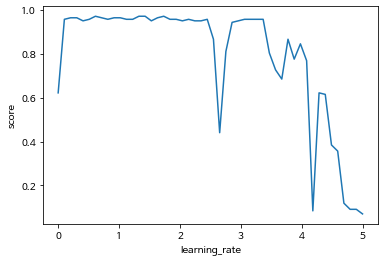

In [7]:
rate = np.linspace(0.000001,5)
score = []
for s in rate:
    gbc = GradientBoostingClassifier(random_state=0, learning_rate=s).fit( X_train, y_train)
    score.append(gbc.score(X_test, y_test))
plt.plot(rate, score)
plt.xlabel("learning_rate")
plt.ylabel("score")

### learning rate에 따른 결과

- 너무 작으면 최적값에 도달하지 못하고 끝나거나
- 너무 크면 차이가 너무 심해서 역시 정확도가 떨어진다
- 클수록 점수가 떨어진다
- 2이상에서 중간에 결과가 뚝뚝 떨어지는 지점이 있는데 해당 rate 값이 경사 하강하면서 최적값에 제대로 근접하지 못한 결과로 보인다..

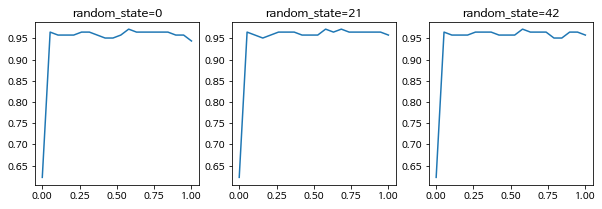

In [8]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

random = [0,21,42]
rate = np.linspace(0.0001,1,20)

for r,ax in zip(random,axes):
    score = []
    for s in rate:
        gbc = GradientBoostingClassifier(random_state=r, learning_rate=s).fit( X_train, y_train)
        score.append(gbc.score(X_test, y_test))
    ax.plot(rate, score)
    ax.set_title("random_state={}".format(r))
    

random state 난수에 따라서 조금씩 영향이 있는 것을 확인할 수 있다

In [9]:
# cancer-model의 중요도 함수
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.title(model.__class__.__name__)
    plt.ylim(-1, n_features)
    plt.grid()

테스트 세트 정확도 : 0.958
총 특성 수 :  30
30


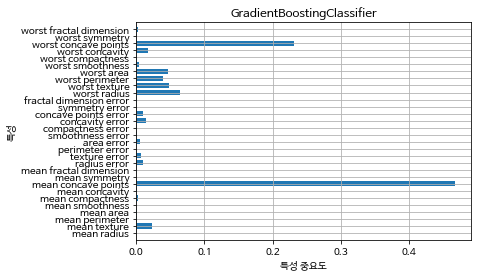

In [21]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=3).fit(X_train, y_train)
plot_feature_importances_cancer(gbc)
print("테스트 세트 정확도 : {:.3f}".format(gbc.score(X_test, y_test)))

print("총 특성 수 : ", cancer.data.shape[1])
print(np.sum(gbc.feature_importances_!=0))

테스트 세트 정확도 : 0.965
15


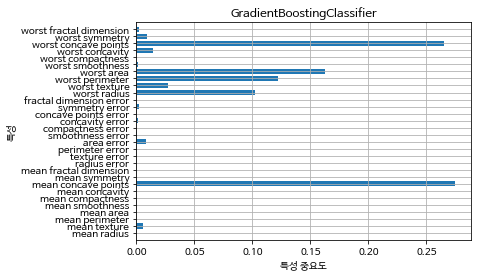

In [16]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)
plot_feature_importances_cancer(gbc)
print("테스트 세트 정확도 : {:.3f}".format(gbc.score(X_test, y_test)))

print(np.sum(gbc.feature_importances_!=0))

테스트 세트 정확도 : 0.070
21


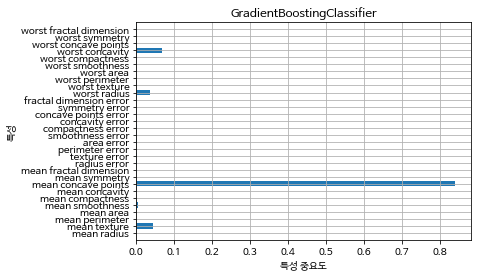

In [26]:
gbc = GradientBoostingClassifier(random_state=0, learning_rate=5).fit(X_train, y_train)
plot_feature_importances_cancer(gbc)
print("테스트 세트 정확도 : {:.3f}".format(gbc.score(X_test, y_test)))

print(np.sum(gbc.feature_importances_!=0))

max depth = 1로 바꾼 결과

테스트 세트 정확도 : 0.972
30


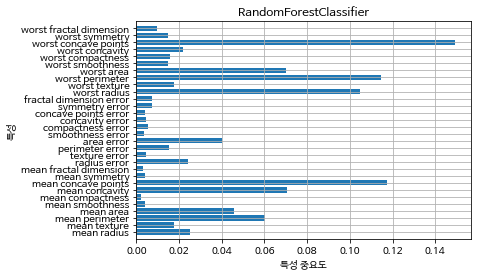

In [18]:
rfc = RandomForestClassifier(random_state=0).fit(X_train,y_train)
plot_feature_importances_cancer(rfc)
print("테스트 세트 정확도 : {:.3f}".format(rfc.score(X_test, y_test)))

print(np.sum(rfc.feature_importances_!=0))

In [33]:
emul = rfc.estimators_

print(emul[0].__class__.__name__, len(emul))
for n in emul:
    print(np.sum(n.feature_importances_!=0), end = ' ')

DecisionTreeClassifier 100
15 11 18 13 12 14 11 17 12 15 14 14 12 10 14 11 10 13 13 13 14 17 12 13 12 13 14 14 11 10 17 15 13 14 15 17 11 12 16 12 10 12 17 13 11 16 11 13 13 15 16 15 14 11 14 17 13 14 18 15 16 13 13 10 13 13 12 11 14 11 8 14 13 12 17 13 11 10 15 13 11 9 12 12 12 17 12 17 16 12 20 12 16 14 14 12 15 13 15 15 

랜덤 포레스트에 들어있는 기본 100개 분류기 각각의 중요도....

모두 더해져서 랜덤포레스트에 포함됨

테스트 세트 정확도 : 0.930
[0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]
9


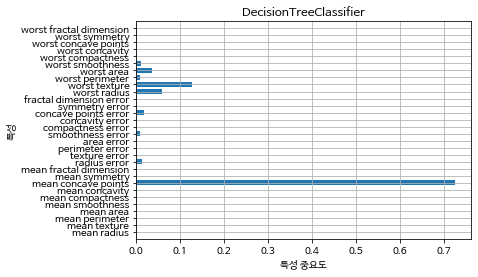

In [24]:
dt = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
plot_feature_importances_cancer(dt)
print("테스트 세트 정확도 : {:.3f}".format(dt.score(X_test, y_test)))

print(dt.feature_importances_)
print(np.sum(dt.feature_importances_!=0))

- random forest의 경우는 여러 트리를 종합하므로 많은 feature 포함
- gradient는 수정해나가는 순차적 방법이라 포함되지 않은 feature 있음
> - depth를 낮추면 사용되는 특성의 수가 더 줄어든다.
> - learning rate를 조절하는 경우에도 역시 영향이 간다
- decisiontree 는 단 한 번이므로 random_state에 의해서 나뉜 feature만을 포함
> - 가장 적은 중요도 0이 아닌 특성을 가진다

- 랜덤 포레스트보다 더 좋은 성능을 내야할 때
- 매개변수를 잘 조정해서 사용 >> 매개변수에 민감함


## make blobs

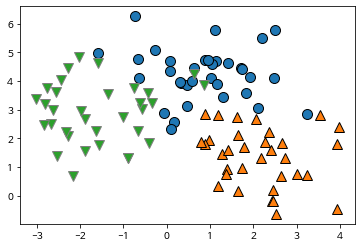

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


mglearn.discrete_scatter(X[:,0], X[:,1],y)

feature_importances
[0.57406944 0.42593056]
[0.54904104 0.45095896]
[0.48506394 0.51493606]


confusion_matrix
[[6 2 1]
 [0 6 0]
 [1 0 9]]
[[ 7  1  1]
 [ 0  6  0]
 [ 0  0 10]]
[[7 1 1]
 [0 6 0]
 [1 0 9]]


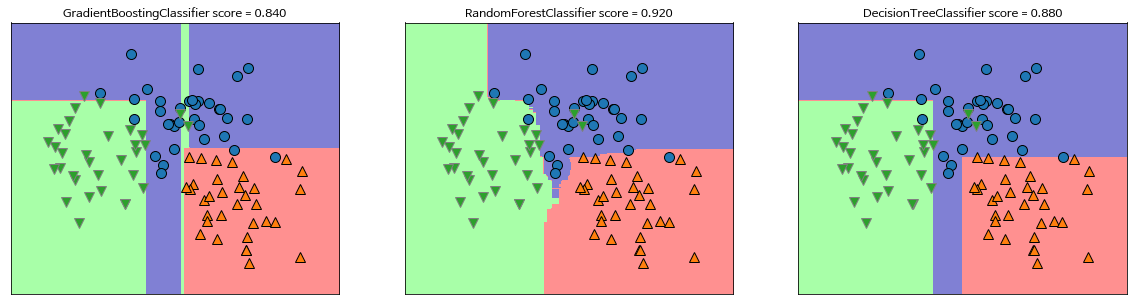

In [36]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0,max_depth=3).fit( X_train, y_train)
rfc = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3).fit(X_train, y_train)
dtc = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model = [gbc, rfc, dtc]

for m, ax in zip(model, axes):
    mglearn.plots.plot_2d_classification(m, X, fill=True, alpha=.5, ax = ax)
    ax.set_title('{} score = {:.3f}'.format(m.__class__.__name__ , accuracy_score(y_test, m.predict(X_test))))
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    
print("feature_importances")
for m in model:
    print(m.feature_importances_)

print("\n\nconfusion_matrix")
for m in model:
    cm = confusion_matrix(y_test, m.predict(X_test))
    print(cm)

make blobs 데이터로 비교

- gradient boosting의 결과가 제일 좋지 않았음..
- 가운데 초록색 클래스를 분류하려다가 파란 클래스까지 넘어가서..

## iris data

In [37]:
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,random_state=0)

In [38]:
def plot_feature_importances_iris(model,ax):
    n_features = iris.data.shape[1]
    ax.barh(range(n_features), model.feature_importances_)
    ax.set_yticks(np.arange(n_features)) # y축
    ax.set_yticklabels(iris.feature_names) # y축
    ax.set_xlabel("특성 중요도")
    ax.set_ylabel("특성")
    ax.set_ylim(0, n_features)
    ax.set_xlim(0,1)
    ax.grid()
    ax.set_title(model.__class__.__name__)
    
# ax에 set yticks설정은 set_yticks와 set_yticklabels로 나누어 설정해주어야 한다
# 오류남!

#그냥 plt에 설정은 yticks( ytics , label ) 로 가능함

GradientBoostingClassifier
test score = 0.974
train score = 1.000
RandomForestClassifier
test score = 0.974
train score = 1.000
DecisionTreeClassifier
test score = 0.974
train score = 1.000


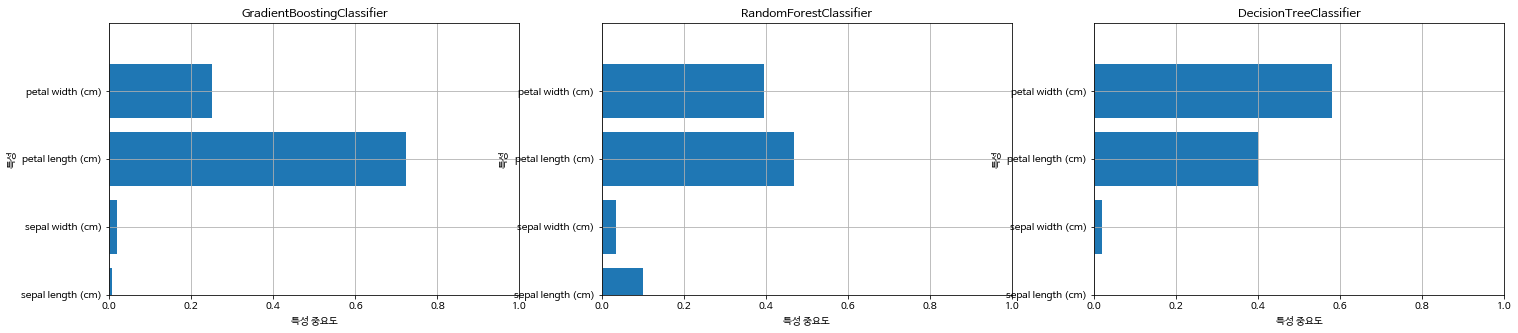

In [41]:
fig, axes = plt.subplots(1,3,figsize=(25,5))
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0).fit( X_train, y_train)
rfc = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
dtc = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

model = [gbc, rfc, dtc]


for m, ax in zip(model, axes):
    print(m.__class__.__name__)
    print("test score = {:.3f}".format(accuracy_score(y_test, m.predict(X_test))))
    print("train score = {:.3f}".format(accuracy_score(y_train, m.predict(X_train))))
    plot_feature_importances_iris(m, ax)

#### iris 데이터로 비교

- 셋 다 테스트 데이터에 관해서는 같은 결과! > default 파라미터
- gradient는 train 데이터에 대해서 과대적합된 결과를 보여줬다 < 모델을 합하는게 아니라 이전 모델 개선이라서.. 계속 훈련 데이터에 맞춰짐
- 특성 중요도의 경우 결정 트리는 한 가지는 아예 포함되지 않았고
- 부스팅 모델은 포함되긴 했으나 랜덤 포레스트보다는 그 정도가 좀 더 극단적임

GradientBoostingClassifier
test score = 0.974
train score = 0.973
RandomForestClassifier
test score = 0.974
train score = 0.973
DecisionTreeClassifier
test score = 0.974
train score = 0.982


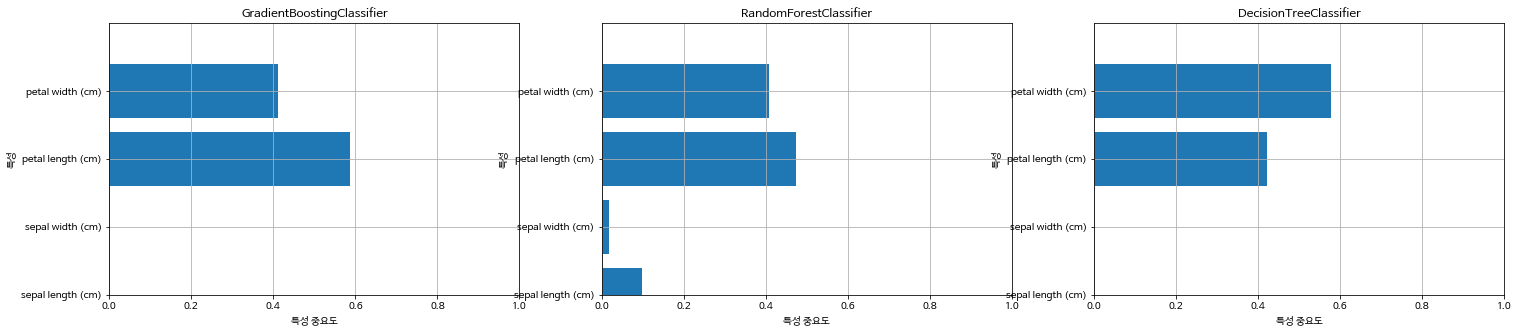

In [43]:
fig, axes = plt.subplots(1,3,figsize=(25,5))
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0, learning_rate=0.01, max_depth = 1).fit( X_train, y_train)
rfc = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=3).fit(X_train, y_train)
dtc = DecisionTreeClassifier(random_state=0, max_depth = 3).fit(X_train,y_train)

model = [gbc, rfc, dtc]


for m, ax in zip(model, axes):
    print(m.__class__.__name__)
    print("test score = {:.3f}".format(accuracy_score(y_test, m.predict(X_test))))
    print("train score = {:.3f}".format(accuracy_score(y_train, m.predict(X_train))))
    plot_feature_importances_iris(m, ax)

#### 과적합을 막기위해서 파라미터에 변화를 주었음

- grandientboosting은 학습률과 트리 깊이
- randomforest는, decisiontree는 max depth설정

### GradientBoostingRegression

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from mglearn.datasets import load_extended_boston

X,y = load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

#plt.plot(X[:,0],y, '.')
#plt.show()

In [6]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

print("train score = {:.3f}".format(gbr.score(X_train, y_train)))
print("test score = {:.3f}".format(gbr.score(X_test, y_test)))

# 회귀 모델에서는 accuracy_score 사용 불가능함

train score = 0.989
test score = 0.769


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

gbr = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

rf = RandomForestRegressor(random_state=0).fit(X_train, y_train) #랜덤포레스트
decreg = DecisionTreeRegressor(random_state=0).fit(X_train, y_train) #결정트리회귀
lr = LinearRegression().fit(X_train, y_train) #선형회귀
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train) # k이웃회귀
ridge = Ridge(alpha=0.01, max_iter=3000).fit(X_train, y_train) #릿지
lasso = Lasso(alpha=0.01, max_iter=3000).fit(X_train, y_train) #라쏘


print("Train")
print("GradientBoosting : {:.3f}".format(gbr.score(X_train,y_train)))
print("RandomForest : {:.3f}".format(rf.score(X_train,y_train)))
print("decisionTree : {:.3f}".format(decreg.score(X_train,y_train)))
print("linear : {:.3f}".format(lr.score(X_train,y_train)))
print("knn : {:.3f}".format(lasso.score(X_train,y_train)))
print("ridge : {:.3f}".format(ridge.score(X_train,y_train)))
print("Lasso : {:.3f}".format(lasso.score(X_train,y_train)))


print("\nTEST")
print("GradientBoosting : {:.3f}".format(gbr.score(X_test,y_test)))
print("RandomForest : {:.3f}".format(rf.score(X_test,y_test)))
print("decisionTree : {:.3f}".format(decreg.score(X_test,y_test)))
print("linear : {:.3f}".format(lr.score(X_test,y_test)))
print("knn : {:.3f}".format(lasso.score(X_test,y_test)))
print("ridge : {:.3f}".format(ridge.score(X_test,y_test)))
print("Lasso : {:.3f}".format(lasso.score(X_test,y_test)))


Train
GradientBoosting : 0.989
RandomForest : 0.986
decisionTree : 1.000
linear : 0.952
knn : 0.896
ridge : 0.944
Lasso : 0.896

TEST
GradientBoosting : 0.769
RandomForest : 0.771
decisionTree : 0.652
linear : 0.607
knn : 0.766
ridge : 0.702
Lasso : 0.766


부스팅 모델까지 해서 비교해봄

- 결정 트리는 훈련 데이터에 대해서 과적합된 결과를 보여줌
- 결정 트리보다 boosting, bagging 모델의 성능이 더 좋다


- linear보다 ridge, lasso성능이 더 좋다

In [11]:
rate = [0.0001,0.001,0.01,0.1,0.3,0.5,0.7,1,2]
score = []
for s in rate:
    gbr = GradientBoostingRegressor(random_state=0, learning_rate=s).fit( X_train, y_train)
    score.append("{:.3f}".format(gbr.score(X_test, y_test)))

df = pd.DataFrame(score, index=rate, columns=["정확도"])
display(df)


,정확도
0.0001,0.012
0.0010,0.121
0.0100,0.635
0.1000,0.769
0.3000,0.733
0.5000,0.696
0.7000,0.706
1.0000,0.616
2.0000,-0.600


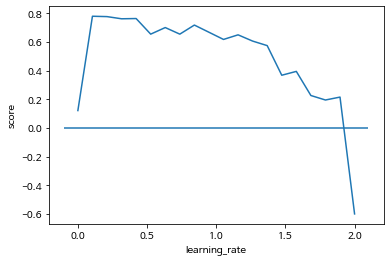

In [26]:
rate = np.linspace(0.001,2,20)
score = []
for s in rate:
    gbr = GradientBoostingRegressor(random_state=0, learning_rate=s).fit(X_train, y_train)
    score.append(gbr.score(X_test, y_test))
plt.plot(rate, score)
plt.xlabel("learning_rate")
plt.ylabel("score")
xl = plt.xlim()
plt.hlines(0, xl[0], xl[1])

학습률에 따른 결과

- 학습률이 2일때 정확도가 -값이 나온다.. << 최악

In [34]:
gbr = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
print("{:.3f}".format(gbr.score(X_test, y_test)))

cvs = cross_val_score(gbr, X, y, cv=5)
print("cv = 5   {:.3f}".format(cvs.mean()))

cvs = cross_val_score(gbr, X, y, cv=10)
print("cv = 10  {:.3f}".format(cvs.mean()))

0.769
cv = 5   0.666
cv = 10  0.472


In [35]:
rfr = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print("{:.3f}".format(rfr.score(X_test, y_test)))

cvs = cross_val_score(rfr, X, y, cv=5)
print("cv = 5   {:.3f}".format(cvs.mean()))

cvs = cross_val_score(rfr, X, y, cv=10)
print("cv = 10  {:.3f}".format(cvs.mean()))

0.771
cv = 5   0.619
cv = 10  0.467


 boston 데이터에 따른 결과
- gradient boosting 모델과 random forest 모델 모두 거의 비슷한 정확도를 가짐!